# Learning to create plots for the U01 exRNA Healthy Control study

## Load the miRNA expression data and sample sheet

In [77]:
import pandas as pd
mir_cpm = pd.read_csv('get_canonical/canon_mir_logCPM.csv', index_col=0)
mir_cpm.columns = pd.Index([int(i.strip('X')) for i in mir_cpm.columns])  # remove the leading X introducted by R
mir_cpm = mir_cpm.sort_values(by=list(mir_cpm.columns), ascending=False)
mir_cpm.head()

,1,2,3,4,5,6,7,8,9,10,...,129,130,131,132,133,134,135,136,137,138
hsa-miR-486-5p,19.310086,21.464672,23.510937,16.338519,21.721192,19.392272,20.010467,18.671968,19.266155,18.688469,...,18.766341,21.244448,20.532916,18.520397,21.815651,17.956362,19.520978,21.637570,18.615737,21.928999
hsa-miR-92a-3p,16.212096,18.335216,20.431364,13.197736,18.762006,16.968885,17.849461,15.843412,16.365462,16.956186,...,16.128020,18.579064,17.981034,16.185202,19.270375,16.606151,16.720886,18.583928,15.922004,18.845638
hsa-miR-22-3p,15.088250,17.038568,19.365800,12.526024,17.947214,16.672730,17.300714,15.300579,15.144138,16.700246,...,13.783616,16.241567,15.588095,13.700883,16.441069,14.953277,15.512021,15.888593,14.033989,16.131982
hsa-miR-16-5p,15.009126,17.554957,19.357514,12.345035,17.663401,16.340583,17.095055,15.145540,15.530341,16.118357,...,13.160704,15.992181,15.657260,13.432866,16.605885,13.904455,13.769428,16.257337,13.161768,16.480140
hsa-miR-451a,14.497183,16.915099,18.777697,11.673174,16.974696,15.726148,16.214549,14.593907,15.103839,14.927968,...,11.854656,14.637203,14.509769,12.129120,15.662492,12.783863,12.857105,15.081767,11.372655,15.450488


### Use the correct race ontology

In [78]:
samples = pd.read_csv('sample_sheet.csv')
# Age has to be a float
samples['Age'] = samples['Age'].astype(float) 
# capitalize & strip whitespace for consistency
for column in ['Study', 'Gender', 'Race', 'Source']:
    samples[column] = samples[column].str.capitalize()
    samples[column] = samples[column].str.strip()
# use correct ontology terms
race_ontology = {'Asian': 'Asian',
 'Black or african american': 'African American',
 'Mixed/asian & white': 'Multiracial',
 'Mixed/asian &black': 'Multiracial',
 'Mixed/black, white, asian': 'Multiracial',
 'Native hawiian or other pacific islander': 'Pacific Islander',  # "Native Hawaiian or Other Pacific Islander" is the correct term, but it's messing up the graph
 'Pacific islander': 'Pacific Islander',
 'White': 'White'}
for id in samples.index:
    race = samples.at[id, 'Race']
    samples.at[id, 'Race'] = race_ontology[race] if race in race_ontology else 'Multiracial'
samples = samples.loc[(samples['Study'] == 'Healthy controls') & (samples['MISEQ.QC.PASS'] == 'PASS')]  # just use healthy control study for now
columns_to_keep = ['Participant.ID', 'MT.Unique.ID', 'Age', 'Gender', 'Race', 'Source']
samples = samples[columns_to_keep].set_index('MT.Unique.ID').T
samples.head()


MT.Unique.ID,1,2,3,4,5,6,7,8,9,10,...,73,74,75,78,95,97,98,101,111,112
Participant.ID,70014,70016,70028,70029,70038,70057,70067,70082,70092,70103,...,71816,71818,71843,71906,72138,72165,72221*,72255*,70182,70348
Age,23,39,33,27,22,31,29,24,25,22,...,39,22,28,33,22,21,40,28,33,27
Gender,Male,Male,Female,Female,Female,Male,Male,Male,Male,Male,...,Female,Female,Male,Female,Female,Male,Male,Male,Female,Female
Race,Asian,White,White,African American,White,Asian,White,White,Asian,Asian,...,Asian,Asian,White,White,Multiracial,Asian,Asian,Asian,White,African American
Source,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,...,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Serum,Serum


### Combine into one dataframe

In [79]:
data = pd.concat([samples, mir_cpm]).T
samples = samples.T
for mirna in data.columns[5:]:
    data[mirna] = pd.to_numeric(data[mirna])
data['Age'] = data['Age'].astype(float)
data.to_csv('master_data_healthyCtrls.csv')
plasma = data[data['Source'] == 'Plasma'].drop('Source', axis=1)
serum = data[data['Source'] == 'Serum'].drop('Source', axis=1)
#plasma_x_serum = data.loc[samples[]]
data.iloc[:5,:10]

,Participant.ID,Age,Gender,Race,Source,hsa-miR-486-5p,hsa-miR-92a-3p,hsa-miR-22-3p,hsa-miR-16-5p,hsa-miR-451a
1,70014,23.0,Male,Asian,Plasma,19.310086,16.212096,15.088250,15.009126,14.497183
2,70016,39.0,Male,White,Plasma,21.464672,18.335216,17.038568,17.554957,16.915099
3,70028,33.0,Female,White,Plasma,23.510937,20.431364,19.365800,19.357514,18.777697
4,70029,27.0,Female,African American,Plasma,16.338519,13.197736,12.526024,12.345035,11.673174
5,70038,22.0,Female,White,Plasma,21.721192,18.762006,17.947214,17.663401,16.974696


In [80]:
plasma_x_serum = data.loc[(data['Participant.ID'].isin(serum['Participant.ID']) & (data['Participant.ID'].isin(plasma['Participant.ID'])))]
plasma_x_serum

,Participant.ID,Age,Gender,Race,Source,hsa-miR-486-5p,hsa-miR-92a-3p,hsa-miR-22-3p,hsa-miR-16-5p,hsa-miR-451a,...,hsa-miR-764,hsa-miR-7845-5p,hsa-miR-7846-3p,hsa-miR-8060,hsa-miR-8061,hsa-miR-8062,hsa-miR-8069,hsa-miR-8070,hsa-miR-887-5p,hsa-miR-922
1,70014,23.0,Male,Asian,Plasma,19.310086,16.212096,15.088250,15.009126,14.497183,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
2,70016,39.0,Male,White,Plasma,21.464672,18.335216,17.038568,17.554957,16.915099,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
11,70105,40.0,Male,White,Plasma,19.316304,16.462476,15.818400,15.699919,14.566321,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
14,70125,30.0,Female,White,Plasma,18.020898,15.466600,14.234783,14.598393,13.885326,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
15,70182,33.0,Female,White,Plasma,17.660673,14.613756,13.822789,14.396586,13.467254,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
18,70348,27.0,Female,African American,Plasma,16.890228,15.411449,15.333282,14.309475,13.178288,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
21,70416,31.0,Male,White,Plasma,18.946522,16.856438,16.631784,16.641332,15.479939,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
22,70435,24.0,Female,White,Plasma,18.360845,16.291958,16.412455,15.419645,14.043175,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
26,70498,23.0,Female,White,Plasma,19.731588,17.548390,15.883799,16.128651,15.276321,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591
40,71039,28.0,Male,White,Plasma,18.392055,16.798432,16.383900,15.513051,14.440009,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591


## Make some plots

### Race boxplot

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


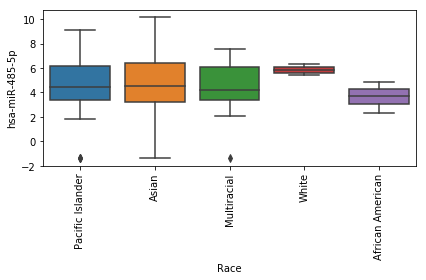

In [81]:
import seaborn as sbn
from matplotlib import pyplot as plt
%matplotlib inline
race_boxplot = sbn.boxplot(data=plasma, y='hsa-miR-485-5p', x='Race')
race_boxplot.set_xticklabels(set(plasma['Race']), rotation=90)
plt.show()

### Overlay swarmplot on boxplot

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


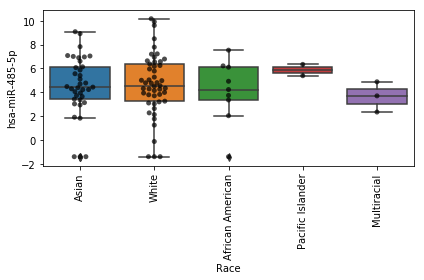

In [82]:
race_plot = sbn.boxplot(data=plasma, y='hsa-miR-485-5p', x='Race')
race_plot.set_xticklabels(set(plasma['Race']), rotation=90)

sbn.swarmplot(data=plasma, y='hsa-miR-485-5p', x='Race', 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
plt.show()

### Age histogram

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


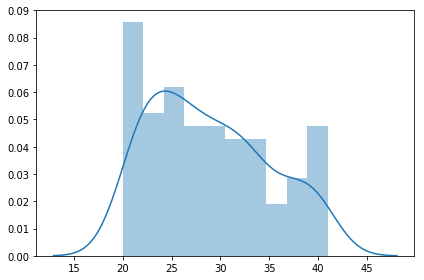

In [83]:
sbn.distplot(list(plasma['Age']), bins=10)
plt.show()

### Age x Gender plot

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


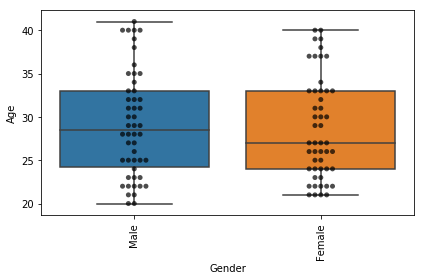

In [84]:
age_gender_plot = sbn.boxplot(data=plasma, y='Age', x='Gender')
age_gender_plot.set_xticklabels(set(plasma['Gender']), rotation=90)
sbn.swarmplot(data=plasma, y='Age', x='Gender', color='k', alpha=0.7)
plt.show()

### Combined Age x Gender Histogram with Age x Race Boxplot

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


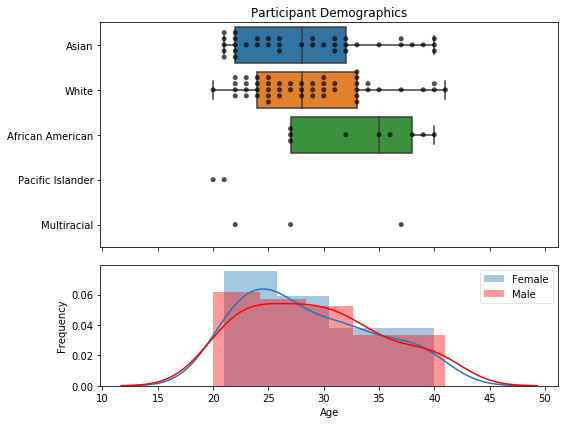

In [97]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})  # should fix labels getting cut off in png file
rcParams['figure.figsize'] = 8,6
demo_fig, demo_ax = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={"height_ratios": (.65, .35)})
sbn.distplot(list(plasma[plasma['Gender'] == 'Female']['Age']), label="Female", ax=demo_ax[1])
sbn.distplot(list(plasma[plasma['Gender'] == 'Male']['Age']), color='red', label="Male", ax=demo_ax[1])

age_race_plot = sbn.boxplot(data=plasma[plasma['Race'].isin(['Asian', 'White', 'African American'])], y='Race', x='Age', ax=demo_ax[0], orient="h")
sbn.swarmplot(data=plasma, x='Age', y='Race', color='k', alpha=0.7, ax=demo_ax[0])
demo_ax[1].set(ylabel="Frequency", xlabel='Age')
demo_ax[0].set(ylabel="", xlabel="")
demo_ax[0].set(title='Participant Demographics')
plt.legend().get_frame().set_alpha(0.5)
plt.show()
demo_fig.savefig('demographics_plot.png')

### Age x Race boxplot

In [26]:
age_race_plot = sbn.boxplot(data=plasma, y='Age', x='Race')#, ax=demo_ax[0])
age_race_plot.set_xticklabels(set(plasma['Race']), rotation=90)
sbn.swarmplot(data=plasma, y='Age', x='Race', color='k', alpha=0.7)#, ax=demo_ax[0])
plt.show()

### Source (Plasma vs Serum) for top miRNA

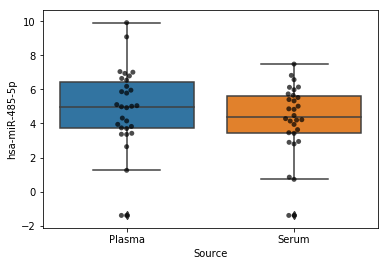

In [10]:
plot = sbn.boxplot(data=plasma_x_serum, y='hsa-miR-485-5p', x='Source')
#plot.set_xticklabels(set(plasma['Gender']), rotation=90)
sbn.swarmplot(data=plasma_x_serum, y='hsa-miR-485-5p', x='Source', color='k', alpha=0.7)
plt.show()

### Age & Gender, mean & standard deviation

In [28]:
females = plasma[plasma['Gender'] == 'Female']
males = plasma[plasma['Gender'] == 'Male']
print("female ages:",females['Age'].mean(), '±', females['Age'].std())
print('male ages:', males['Age'].mean(), '±', males['Age'].std())
print('total:', plasma['Age'].mean(), '±', plasma['Age'].std())

female ages: 28.66 ± 5.87144595061731
male ages: 29.14 ± 6.114586107440643
total: 28.9 ± 5.9687739634084505


### Demographic Counts

In [36]:
for race in set(plasma['Race']):
    for sex in set(plasma['Gender']):
        print(sex, race, plasma[(plasma['Race']==race) & (plasma['Gender']==sex)]['Participant.ID'].count())

Male Asian 19
Female Asian 18
Male African American 4
Female African American 5
Male White 25
Female White 24
Male Native Hawaiian or Other Pacific Islander 1
Female Native Hawaiian or Other Pacific Islander 1
Male Multiracial 1
Female Multiracial 2


### Multi-plot figure (multiple miRNAs)

### Save best plots to disk